In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('Crop Production data.csv')
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [ ]:
df.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [ ]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [ ]:
df.dropna(subset=['Production'],inplace=True)
df.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [ ]:
df_numeric = df.select_dtypes(include=[np.number])
df_encoded = df.copy()
for column in df.select_dtypes(include=[object]).columns:
    df_encoded[column] = df_encoded[column].astype('category').cat.codes


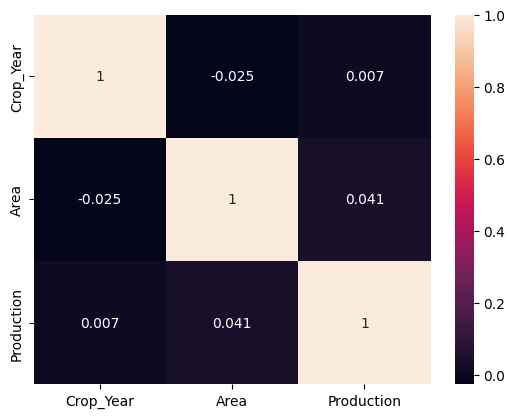

In [ ]:
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()


In [ ]:
df.State_Name.nunique()

33

In [ ]:
df.District_Name.nunique()

646

In [ ]:
print(df.Crop_Year.nunique())

19


In [ ]:
print(df.Crop_Year.value_counts())

Crop_Year
2003    17139
2002    16536
2007    14269
2008    14230
2006    13976
2004    13858
2010    13793
2011    13791
2009    13767
2000    13553
2005    13519
2013    13475
2001    13293
2012    13184
1999    12441
1998    11262
2014    10815
1997     8899
2015      561
Name: count, dtype: int64


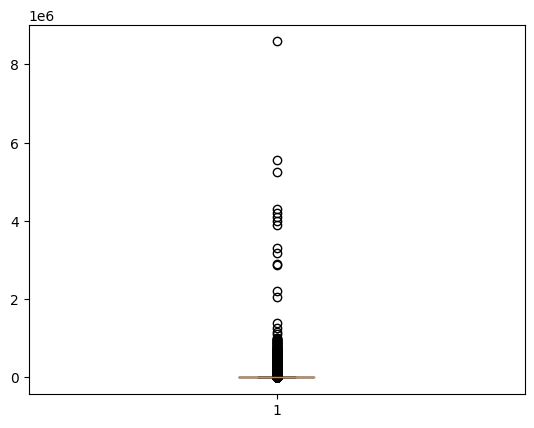

In [ ]:
plt.boxplot(df.Area)
plt.show()

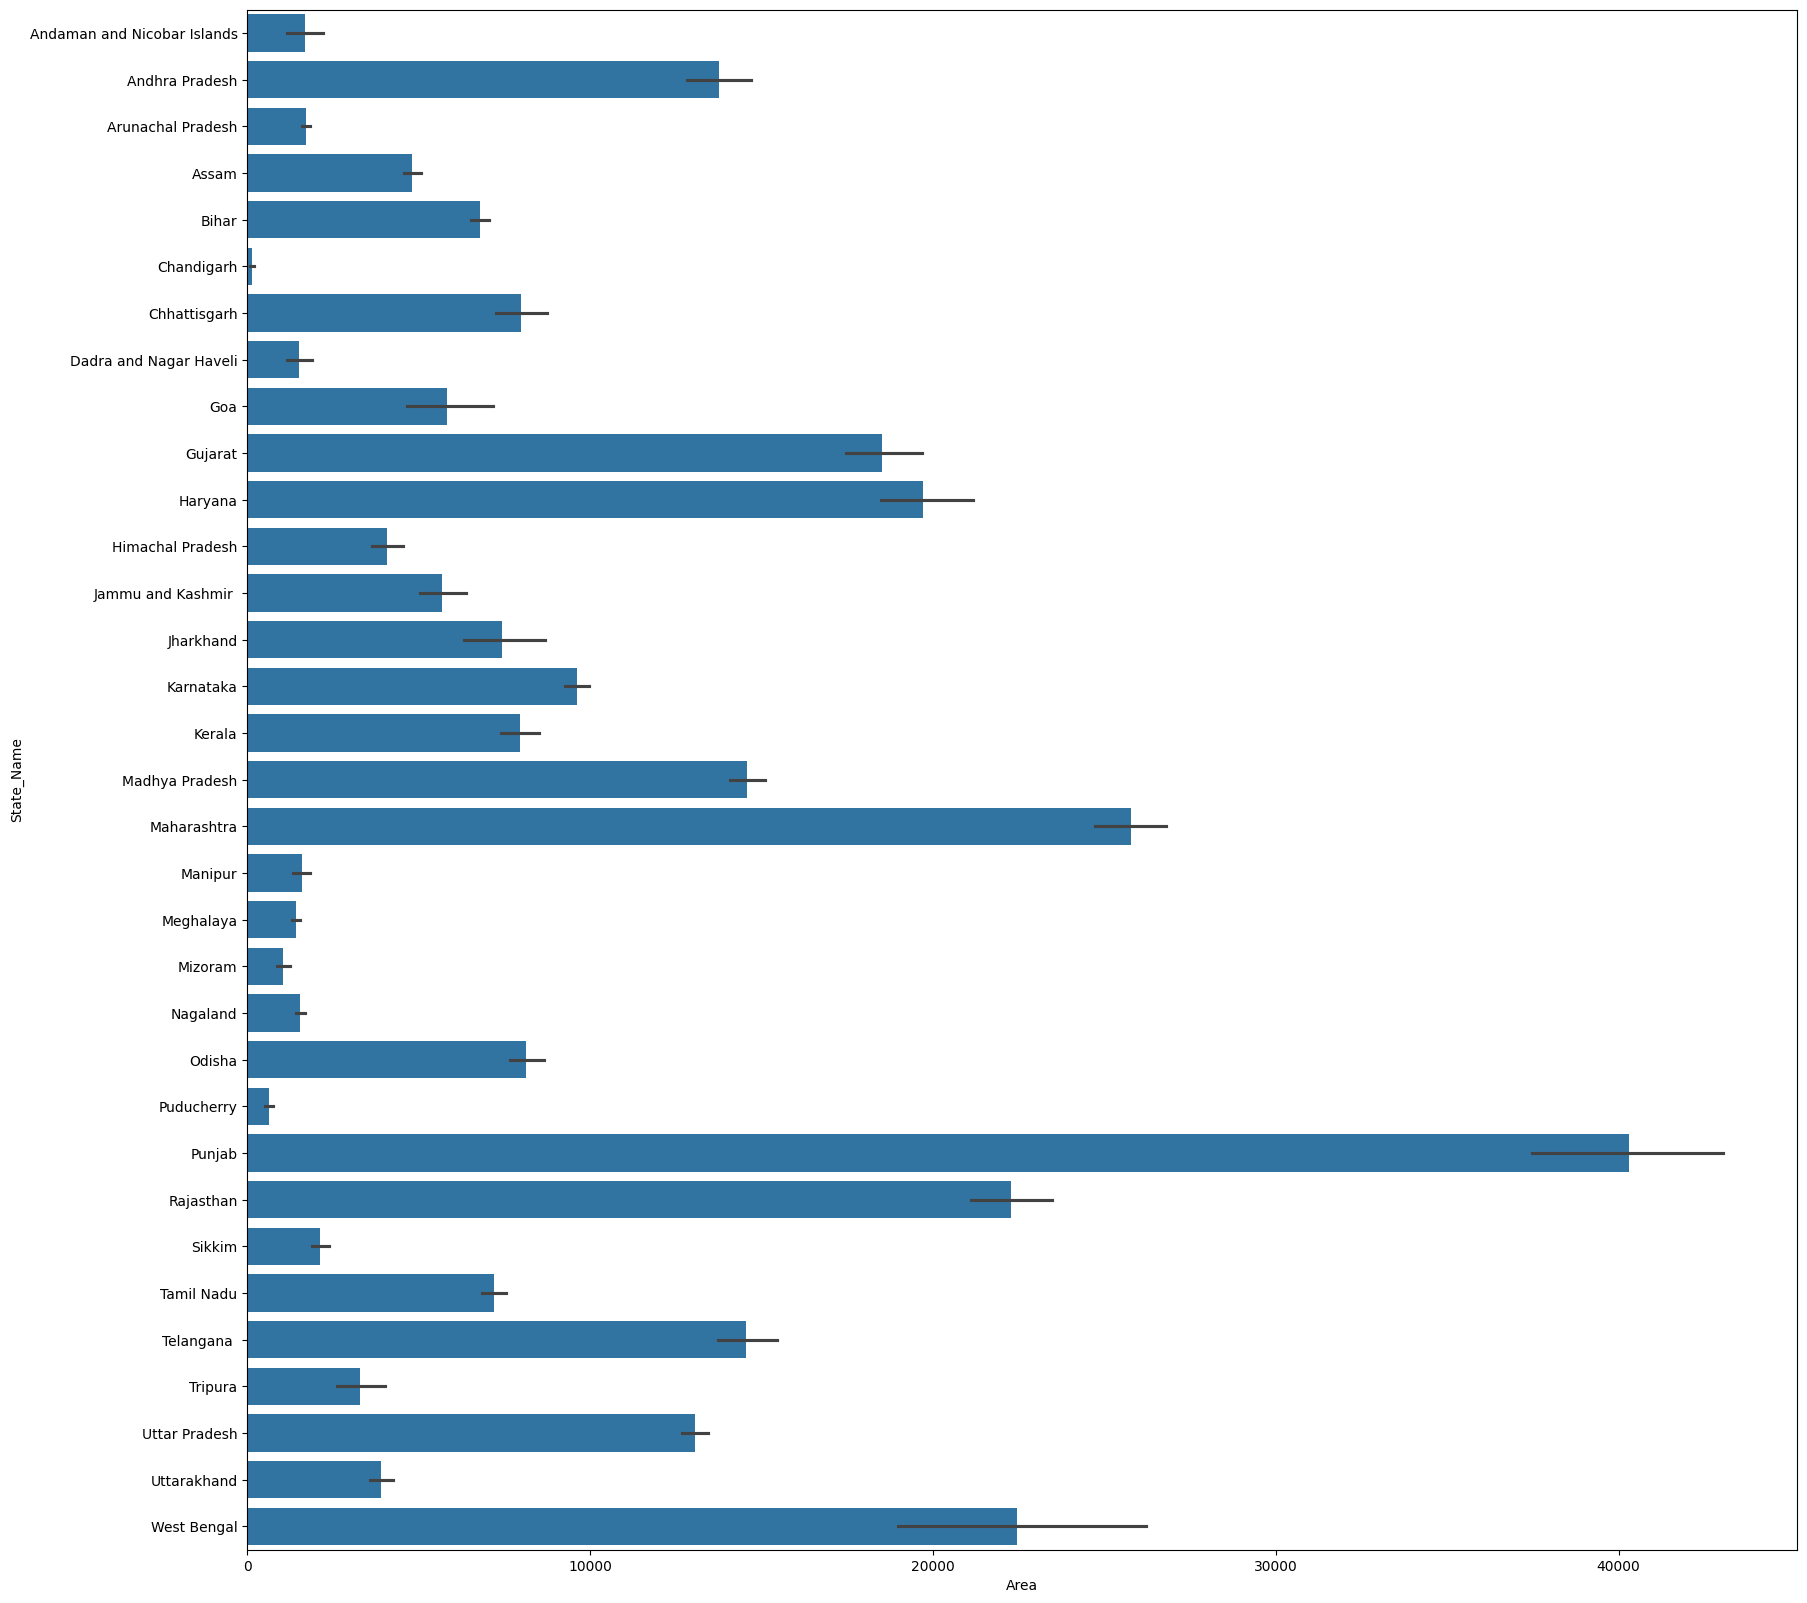

In [ ]:
plt.figure(figsize=(20,20))
sns.barplot(y=df.State_Name,x=df.Area)
plt.show()

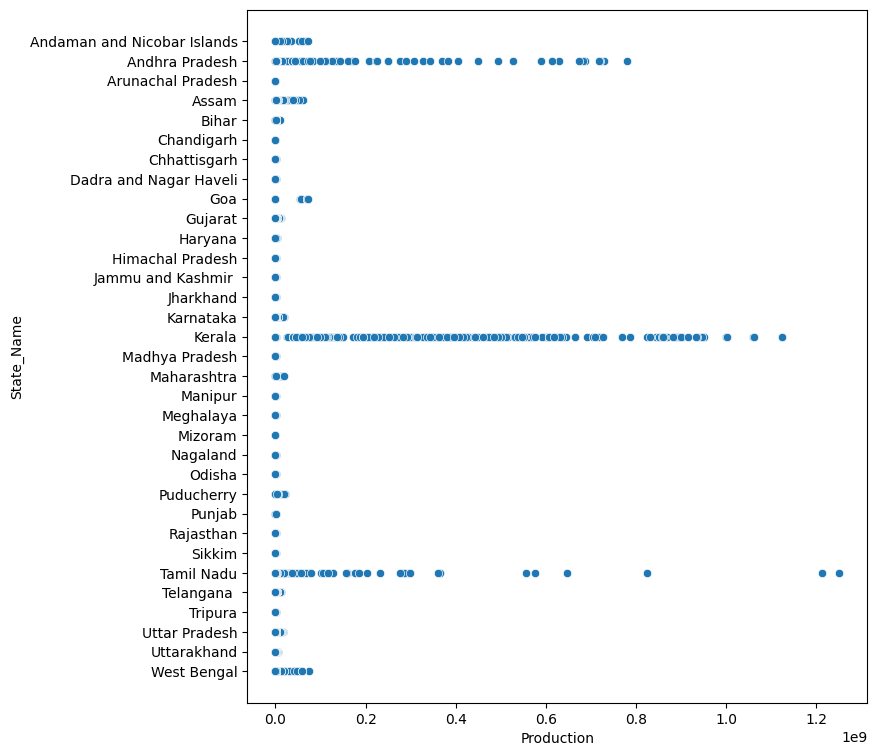

In [ ]:
plt.figure(figsize=(8,9))
sns.scatterplot(y=df.State_Name,x=df.Production)
plt.show()

In [ ]:
zone_mapping = {
    'North Zone': ['Jammu and Kashmir', 'Punjab', 'Himachal Pradesh', 'Haryana', 'Uttarakhand', 'Uttar Pradesh', 'Chandigarh'],
    'East Zone': ['Bihar', 'Odisha', 'Jharkhand', 'West Bengal'],
    'South Zone': ['Andhra Pradesh', 'Karnataka', 'Kerala', 'Tamil Nadu', 'Telangana'],
    'West Zone': ['Rajasthan', 'Gujarat', 'Goa', 'Maharashtra'],
    'Central Zone': ['Madhya Pradesh', 'Chhattisgarh'],
    'NE Zone': ['Assam', 'Sikkim', 'Nagaland', 'Meghalaya', 'Manipur', 'Mizoram', 'Tripura', 'Arunachal Pradesh'],
    'Union Terr': ['Andaman and Nicobar Islands', 'Dadra and Nagar Haveli', 'Puducherry']
}

state_to_zone = {state: zone for zone, states in zone_mapping.items() for state in states}
def get_zonal_names(state_name):
    return state_to_zone.get(state_name.strip(), 'No Value')
df['Zones'] = df['State_Name'].apply(get_zonal_names)

In [ ]:
df['Zones'].unique()

array(['Union Terr', 'South Zone', 'NE Zone', 'East Zone', 'North Zone',
       'Central Zone', 'West Zone'], dtype=object)

In [ ]:
df['Zones'].value_counts()

Zones
South Zone      53500
North Zone      49874
East Zone       43261
West Zone       33134
Central Zone    32972
NE Zone         28284
Union Terr       1336
Name: count, dtype: int64

In [ ]:
crop_categories = {
    'Cereal': ['Rice', 'Maize', 'Wheat', 'Barley', 'Varagu', 'Other Cereals & Millets', 'Ragi',
               'Small millets', 'Bajra', 'Jowar', 'Paddy', 'Total foodgrain', 'Jobster'],
    'Pulses': ['Moong', 'Urad', 'Arhar/Tur', 'Peas & beans', 'Masoor', 'Other Kharif pulses',
               'other misc. pulses', 'Ricebean (nagadal)', 'Rajmash Kholar', 'Lentil', 'Samai',
               'Blackgram', 'Korra', 'Cowpea(Lobia)', 'Other  Rabi pulses', 'Other Kharif pulses',
               'Peas & beans (Pulses)', 'Pulses total', 'Gram'],
    'Fruits': ['Peach', 'Apple', 'Litchi', 'Pear', 'Plums', 'Ber', 'Sapota', 'Lemon', 'Pome Granet',
               'Other Citrus Fruit', 'Water Melon', 'Jack Fruit', 'Grapes', 'Pineapple', 'Orange',
               'Pome Fruit', 'Citrus Fruit', 'Other Fresh Fruits', 'Mango', 'Papaya', 'Coconut', 'Banana'],
    'Beans': ['Bean', 'Lab-Lab', 'Moth', 'Guar seed', 'Soyabean', 'Horse-gram'],
    'Vegetables': ['Turnip', 'Peas', 'Beet Root', 'Carrot', 'Yam', 'Ribed Guard', 'Ash Gourd ',
                   'Pump Kin', 'Redish', 'Snak Guard', 'Bottle Gourd', 'Bitter Gourd', 'Cucumber',
                   'Drum Stick', 'Cauliflower', 'Beans & Mutter(Vegetable)', 'Cabbage', 'Bhindi',
                   'Tomato', 'Brinjal', 'Khesari', 'Sweet potato', 'Potato', 'Onion', 'Tapioca',
                   'Colocosia'],
    'Spices': ['Perilla', 'Ginger', 'Cardamom', 'Black pepper', 'Dry ginger', 'Garlic', 'Coriander',
               'Turmeric', 'Dry chillies', 'Cond-spcs other'],
    'Fibres': ['other fibres', 'Kapas', 'Jute & mesta', 'Jute', 'Mesta', 'Cotton(lint)', 'Sannhamp'],
    'Nuts': ['Arcanut (Processed)', 'Atcanut (Raw)', 'Cashewnut Processed', 'Cashewnut Raw',
             'Cashewnut', 'Arecanut', 'Groundnut'],
    'Oilseeds': ['other oilseeds', 'Safflower', 'Niger seed', 'Castor seed', 'Linseed', 'Sunflower',
                 'Rapeseed &Mustard', 'Sesamum', 'Oilseeds total'],
    'Commercial': ['Tobacco', 'Coffee', 'Tea', 'Sugarcane', 'Rubber']
}
crop_to_category = {crop: category for category, crops in crop_categories.items() for crop in crops}

def cat_crop(crop):
    return crop_to_category.get(crop, 'Unknown')

df['cat_crop'] = df['Crop'].apply(cat_crop)

In [ ]:
df['cat_crop'].unique()

array(['Nuts', 'Pulses', 'Cereal', 'Fruits', 'Unknown', 'Spices',
       'Commercial', 'Vegetables', 'Oilseeds', 'Fibres', 'Beans'],
      dtype=object)

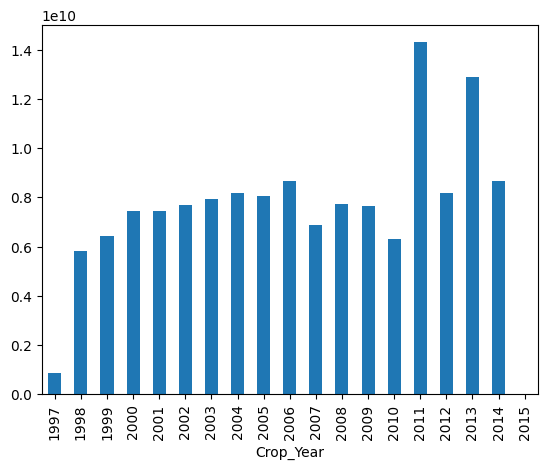

In [ ]:
plt.tick_params(labelsize=10)
Yearly_production=df.groupby("Crop_Year")["Production"].agg("sum")
Yearly_production.plot.bar()
plt.show()

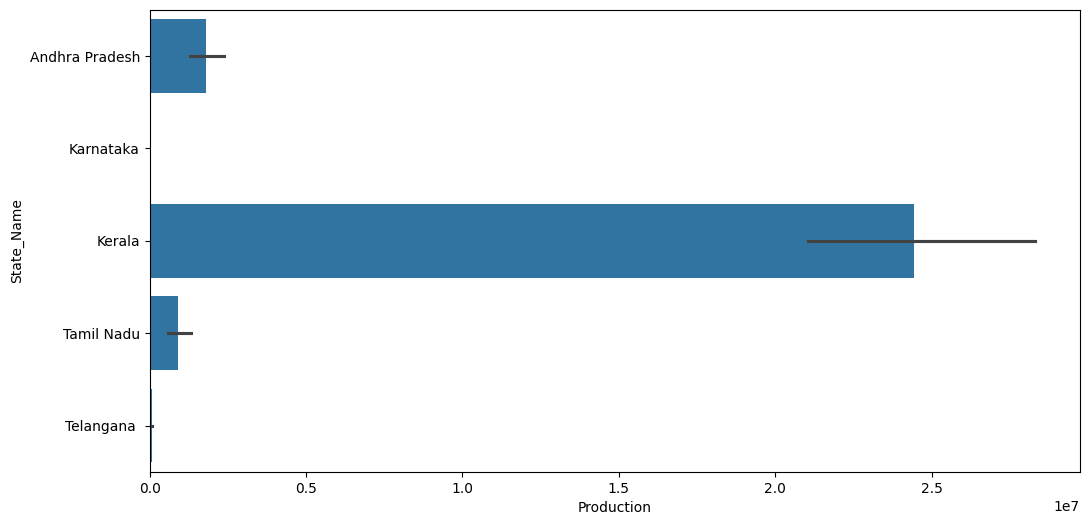

In [ ]:
south_zone =df[(df["Zones"] == 'South Zone')]
plt.subplots(figsize=(12,6))
sns.barplot(y=south_zone.State_Name,x=south_zone.Production)
plt.show()

<Figure size 1500x800 with 0 Axes>

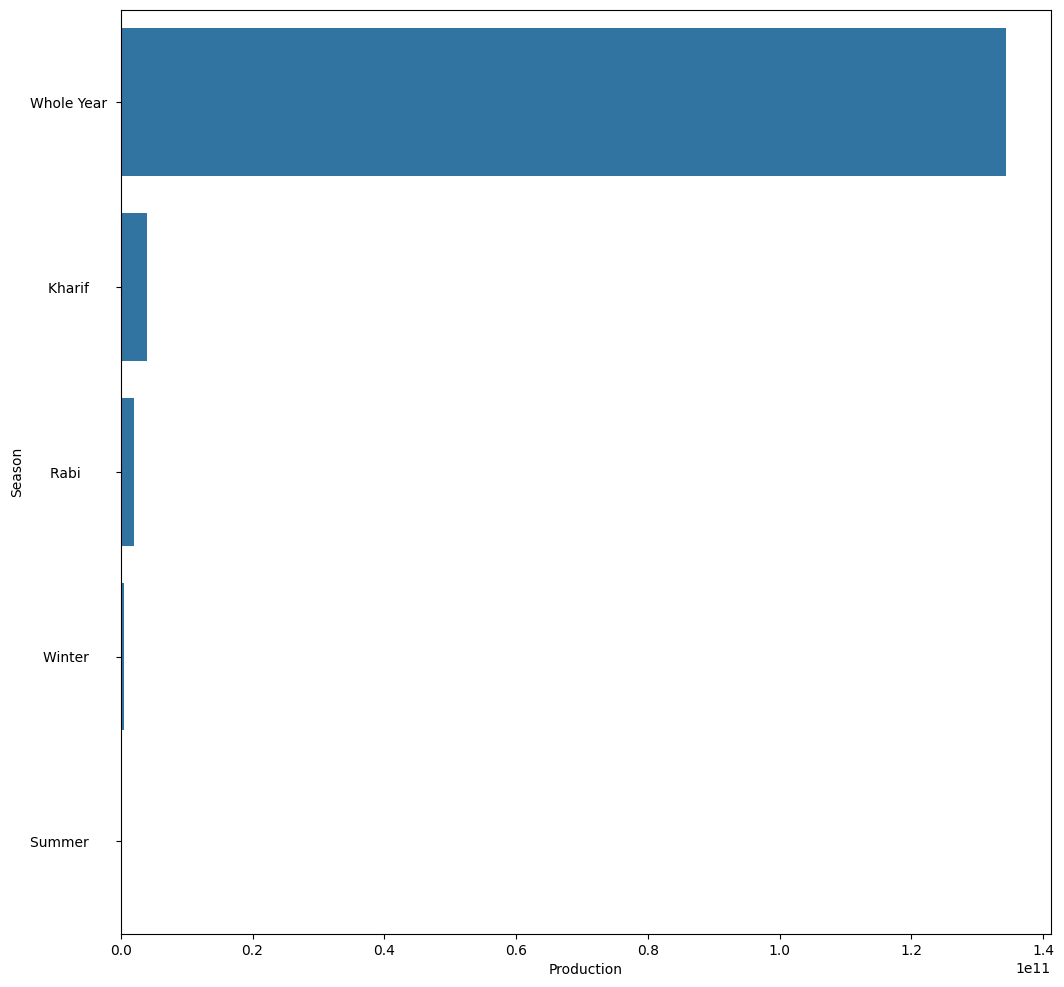

In [ ]:
plt.figure(figsize=(15,8))
Sp=df.groupby(by='Season')['Production'].sum().reset_index().sort_values(by='Production', ascending=False).head()
plt.subplots(figsize=(12,12))
sns.barplot(y=Sp.Season,x=Sp.Production)
plt.show()

In [ ]:
cross_tab=pd.crosstab(df['Zones'],df['cat_crop'])
cross_tab

cat_crop,Beans,Cereal,Commercial,Fibres,Fruits,Nuts,Oilseeds,Pulses,Spices,Unknown,Vegetables
Zones,,,,,,,,,,,
Central Zone,1608,6920,1142,1457,923,1029,4777,6080,4027,1128,3881
East Zone,1163,12771,1735,1918,226,2016,6505,7428,3000,2949,3550
NE Zone,495,6645,1607,1954,1318,851,3914,4466,2774,1050,3210
North Zone,1875,15019,2452,1249,345,1296,6169,10224,3644,2457,5144
South Zone,2223,12423,2198,1697,2730,4094,6413,6473,6271,3290,5688
Union Terr,0,334,57,46,98,144,92,174,142,145,104
West Zone,1751,9171,1370,1464,513,2042,5931,6053,1780,1482,1577


Text(0.5, 1.0, 'cat_crops_count')

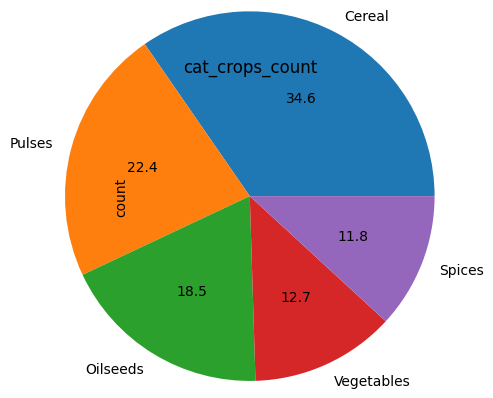

In [ ]:
plt.figure(figsize=(3,3))
df1=df["cat_crop"].value_counts().head(5)
df1.plot(radius=2,kind="pie",autopct="%1.1f")
plt.title("cat_crops_count")

Text(0.5, 1.0, 'Overall Crops vs Production')

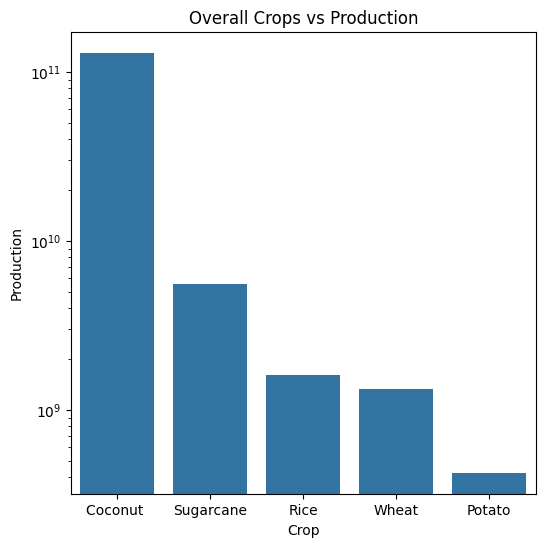

In [ ]:
crop=df.groupby(by='Crop')['Production'].sum().reset_index().sort_values(by="Production", ascending=False).head()
crop.head()
plt.subplots(figsize=(6,6))
sns.barplot(x=crop.Crop,y=crop.Production)
plt.yscale('log')
plt.title("Overall Crops vs Production")